# NLP 기초 Assignment - Tobigs 15기 이성범
## NLP 제대로 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 8주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [2]:
paths = '/content/drive/MyDrive/Tobigs/'
spam = pd.read_csv(paths + 'spam.csv')
tmep_spam = spam.copy()

In [3]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

분석에 들어가기에 앞서 기본적으로 spam문자와 pam문자 사이에 어떠한 차이가 있을까를 생각하며 밑에 내용을 중점적으로 알아볼 예정이다.

전체 문자를 기준으로 분석을 진행한다면 심슨의 역설과 같은 문제가 존재할 수도 있기 때문에 스팸 문자와 팸문자를 나누어 분석을 진행할 예정이다.

- 스팸 문자와 팸 문자 사이에 길이의 차이가 발생하지 않을까?

- 팸 문자에서 중복되는 메세지는 어떤 메세지 일까?
- 스팸 문자에서 중복되는 메세지는 어떤 메세지 일까?

- 스팸 문자에는 어떠한 단어가 반복될까?
- 팸 문자에는 어떠한 단어가 반복될까?



In [4]:
spam.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


총 데이터의 수는 5572개 이며 결측치는 존재하지 않는다는 것을 알 수 있다.

하지만 문자 데이터의 경우 " "과 같은 경우 존재하기 때문에 아직은 결측치가 존재하지 않는다고 단언할 수는 없을 것 같다.

In [6]:
spam.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


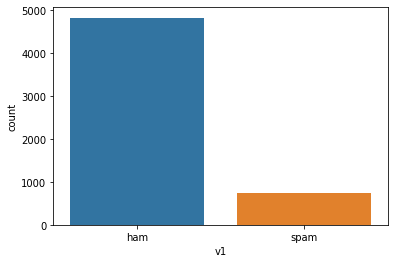

In [7]:
sns.countplot(data = spam, x='v1')

전체 데이터에서 ham 차지하는 비중이 많으며 메세지 내의 unique 데이터와 count 데이터가 다른 것으로 보아 서로 겹치는 단어가 존재한다는 것을 알 수 있다.

추후에 이와 관련하여 분석을 진행해볼 예정이다.

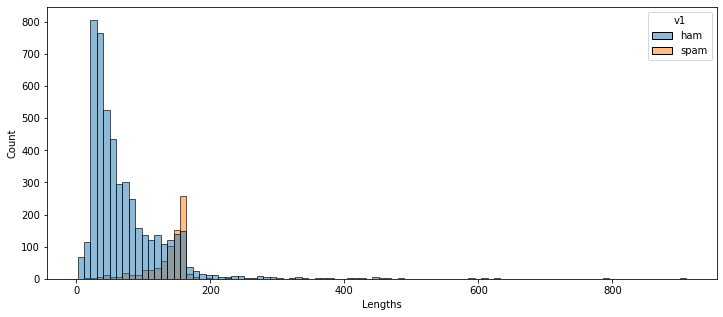

In [8]:
spam['Lengths'] = spam['v2'].apply(lambda x : len(x))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 5))
sns.histplot(data = spam, x = 'Lengths', hue='v1', ax = ax)

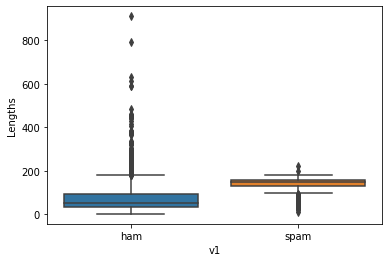

In [9]:
sns.boxplot(data = spam, y='Lengths', x='v1')

spam 문자의 경우가 ham 보다 전체적인 문자의 길이가 더 길다는 것을 알 수 있다 .이러한 이유는 아마 spam 문자의 경우 광고성의 장문의 문자가 있기 때문으로 생각되며 앞으로 분석을 더 진행하여 알아볼 예정이다.

## Tokenizing
- 실습코드에서는 한국어 대상이라 konlpy를 다뤘지만, 영어는 nltk 모듈을 쓸 수 있습니다. 의미 있는 토큰으로 쪼개고 불용어도 처리해보세요! 현존하는 불용어 리스트를 사용해도 좋고, 새롭게 만들어도 좋습니다. 특수문자는 없애주고, 모두 소문자로 변환해주는 전처리도 필요하겠죠?

1. spam의 경우 특수문자를 가지고 있을 가능성이 높다고 생각하여 특수문자를 제거하면 스팸 문자의 특징을 제대로 반영할 수 없다고 생각하여 제거하지 않을 것이다.
2. 스팸 문자의 경우 XxX와 같은 얼굴표시? 느낌의 단어가 존재하기 때문에 이 또한 소문자로 변환해준다면 그 특징을 잊어버린다고 생각하여 소문자로 변환한 단어와 소문자로 변환하지 않은 단어로 나눠 분석을 진행할 예정이다.
3. 영어의 경우 word_tokenize 을 사용하여 단어를 분리해줄 예정이다.
4. 불용어의 경우 nltk 패키지의 불용어로 제거를 할 예정이다.


In [10]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

def get_lower_token(words):
  stopwords = nltk.corpus.stopwords.words('english')

  words = words.lower()
  words = word_tokenize(words)
  words = [word for word in words if word not in stopwords]

  return words

def get_token(words):
  stopwords = nltk.corpus.stopwords.words('english')

  words = word_tokenize(words)
  words = [word for word in words if word not in stopwords]

  return words

def get_words(x):
  return " ".join(x)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
spam['lower_token'] = spam['v2'].apply(lambda words : get_lower_token(words))
spam['token'] = spam['v2'].apply(lambda words : get_token(words))
spam['lower_words'] = spam['lower_token'].apply(lambda words : get_words(words))
spam['words'] = spam['token'].apply(lambda words : get_words(words))

In [12]:
spam.head()

,v1,v2,Lengths,lower_token,token,lower_words,words
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, ,, crazy.., available, bug...","[Go, jurong, point, ,, crazy.., Available, bug...","go jurong point , crazy.. available bugis n gr...","Go jurong point , crazy.. Available bugis n gr..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, ..., joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]",ok lar ... joking wif u oni ...,Ok lar ... Joking wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor, ..., u, c, already, ...","[U, dun, say, early, hor, ..., U, c, already, ...",u dun say early hor ... u c already say ...,U dun say early hor ... U c already say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, n't, think, goes, usf, ,, lives, around,...","[Nah, I, n't, think, goes, usf, ,, lives, arou...","nah n't think goes usf , lives around though","Nah I n't think goes usf , lives around though"


In [13]:
spam.describe(include='all')

,v1,v2,Lengths,lower_token,token,lower_words,words
count,5572,5572,5572.000000,5572,5572,5572,5572
unique,2,5169,NaN,5146,5151,5146,5151
top,ham,"Sorry, I'll call later",NaN,"[sorry, ,, 'll, call, later]","[Sorry, ,, I, 'll, call, later]","sorry , 'll call later","Sorry , I 'll call later"
freq,4825,30,NaN,30,30,30,30
mean,NaN,NaN,80.118808,NaN,NaN,NaN,NaN
std,NaN,NaN,59.690841,NaN,NaN,NaN,NaN
min,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,36.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,61.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,121.000000,NaN,NaN,NaN,NaN


## Embedding + Insight

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [14]:
spam_sentence = spam[spam['v1'] == 'spam']['v2'].unique().tolist()
ham_sentence = spam[spam['v1'] == 'ham']['v2'].unique().tolist()

In [15]:
spam[spam['v1'] == 'spam']['v2'].value_counts()[spam[spam['v1'] == 'spam']['v2'].value_counts() >= 1]

Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!                   4
I don't know u and u don't know me. Send CHAT to 86688 now and let's find each other! Only 150p/Msg rcvd. HG/Suite342/2Lands/Row/W1J6HL LDN. 18 years or over.          3
FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+          3
Camera - You are awarded a SiPix Digital Camera! call 09061221066 fromm landline. Delivery within 28 days.                                                              3
Loan for any purpose å£500 - å£75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'    3
                                                                                                                                                      

In [16]:
spam[spam['v1'] == 'ham']['v2'].value_counts()[spam[spam['v1'] == 'ham']['v2'].value_counts() >= 1]

Sorry, I'll call later                                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                                    12
Ok...                                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"                               4
Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.     4
                                                                      

In [17]:
# ham 메세지의 수
len(ham_sentence)

4516

In [18]:
# spam 메세지의 수
len(spam_sentence)

653

In [19]:
# spam 에만 존재하는 문장의 수
len(set(spam_sentence) - set(ham_sentence))

653

In [20]:
# ham 에만 존재하는 문장의 수
len(set(ham_sentence) - set(spam_sentence))

4516

In [21]:
# spam 과 ham 모두에 존재하는 문장
set(ham_sentence) & set(spam_sentence)

set()

1. spam 문자의 경우 전체적으로 광고성의 문자를 포함하므로 긴 문자를 가지는 경우가 많다.
2. ham 문자의 경우 짤은 단답의 대화 (OK 등), 지금 전화를 받을 수 없다는 류의 메시지가 많이 사용된다는 것을 알 수 있다.
3. spam과 ham 문자 사이에는 서로 겹치는 문자가 존재하지 않는다. 따라서 대부분 전회번호를 스팸처리를 할 때 동일한 번호를 스팸처리하는 경우가 많은데 이는 ham과 spam이 완전히 다른 형태를 띄며 기존의 spam과 동일한 문자가 온다면 100% spam이라는 가정을 가지기 때문이라고 생각된다. 

### CountVectorizer (소문자)



In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cv_model = CountVectorizer(min_df = 50, lowercase=False)
cv_model.fit(spam['lower_words'].values)
doc = cv_model.transform(spam['lower_words'].values).toarray()

In [23]:
cv_df = pd.DataFrame(doc, columns = cv_model.get_feature_names())
cv_df['v1'] = spam['v1']

In [24]:
cv_df.iloc[:, :-1].sum().sort_values(ascending=False)

call          591
get           391
ur            385
gt            318
lt            316
             ... 
16             52
fine           52
coming         51
18             51
guaranteed     50
Length: 158, dtype: int64

In [25]:
spam_words = cv_df[cv_df['v1'] == 'spam'].iloc[:, :-1].sum()[cv_df[cv_df['v1'] == 'spam'].iloc[:, :-1].sum() > 1].index.tolist()

In [26]:
ham_words = cv_df[cv_df['v1'] == 'ham'].iloc[:, :-1].sum()[cv_df[cv_df['v1'] == 'ham'].iloc[:, :-1].sum() > 1].index.tolist()

In [27]:
# spam 에만 존재하는 단어
set(spam_words) - set(ham_words)

{'150p', '16', '18', 'claim', 'guaranteed', 'prize', 'uk'}

### CountVectorizer (소문자 변환 X)



In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv_model = CountVectorizer(min_df = 50, lowercase=False)
cv_model.fit(spam['words'].values)
doc = cv_model.transform(spam['words'].values).toarray()

In [29]:
cv_df = pd.DataFrame(doc, columns = cv_model.get_feature_names())
cv_df['v1'] = spam['v1']

In [30]:
cv_df.iloc[:, :-1].sum().sort_values(ascending=False)

call      405
get       338
gt        318
lt        316
ur        294
         ... 
leave      52
When       52
16         52
18         51
coming     51
Length: 171, dtype: int64

In [31]:
spam_words = cv_df[cv_df['v1'] == 'spam'].iloc[:, :-1].sum()[cv_df[cv_df['v1'] == 'spam'].iloc[:, :-1].sum() > 1].index.tolist()

In [32]:
ham_words = cv_df[cv_df['v1'] == 'ham'].iloc[:, :-1].sum()[cv_df[cv_df['v1'] == 'ham'].iloc[:, :-1].sum() > 1].index.tolist()

In [33]:
# spam 에만 존재하는 단어
set(spam_words) - set(ham_words)

{'150p', '16', '18', 'FREE', 'STOP', 'claim', 'prize', 'uk'}

'claim', 'guaranteed', 'prize', 'uk', 'FREE', 'STOP' 가 Spam 에만 존재하는 단어이다.

여기서 흥미로운 점은 대문자 FREE, STOP은 spam이지만 소문자라면 spam이 아닐 수도 있다는 점이다. 이는 대문자의 경우 강조라는 느낌을 주기 때문에 광고성으로 FREE, STOP 이 사용된다는 것으로 에상해볼 수 있다.

그리고 전체 문자에서 call이라는 단어가 제일 많이 쓰인다는 것을 알 수 있는데 이는 광고에서는 전화주세요로 일상 대화에서는 나중에 전화드리겠습니다 등의 느낌으로 쓰이기 때문에 문자에서 제일 많이 쓰인다는 것을 알 수 있다.

이제 spam에만 존재하는 단어들이 어떻게 사용되는지 알아볼 예정이다.

In [34]:
def get_things(serch, words, idx, col):
  if serch in words:
    print(spam.loc[idx, col])

In [35]:
for idx, words in enumerate(spam['lower_words'].values):
  get_things('claim', words, idx, 'v2')

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or å£1000. To claim txt DIS to 87121 18+6*å£1.50(moreFrmMob. ShrAcomOrSglSuplt)10, LS1 3AJ
GENT! We are trying to contact you. Last weekends draw shows that you won a å£1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm
You are a winner U have been specially selected 2 receive å£1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910p/min (18+) 
PRIVATE! Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires
Todays Voda numbers ending 7548 are selected to receive a $350 

광고에서 claim이 많이 쓰인다는 것을 알 수 있으며 사실상 사람끼리의 대화에서는 claim을 쓸 이유가 많이 없다.

In [36]:
for idx, words in enumerate(spam['lower_words'].values):
  get_things('guaranteed', words, idx, 'v2')

Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed å£1000 cash or å£5000 prize!
GENT! We are trying to contact you. Last weekends draw shows that you won a å£1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm
URGENT! We are trying to contact you. Last weekends draw shows that you have won a å£900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!
Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16
Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16
URGENT! Your Mobile number has been awarded with a å£2000 prize GUARANTEED. Call 090580944

광고에서 guaranteed가 많이 쓰인다는 것을 알 수 있으며 사실상 사람끼리의 대화에서는 guaranteed를 쓸 이유가 많이 없다.

In [37]:
for idx, words in enumerate(spam['lower_words'].values):
  get_things('prize', words, idx, 'v2')

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a å£1500 Bonus Prize, call 09066364589
Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed å£1000 cash or å£5000 prize!
GENT! We are trying to contact you. Last weekends draw shows that you won a å£1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm
URGENT! Your Mobile No. was awarded å£2000 Bonus Caller Prize on 5/9/03 This is our final try to contact U! Call from Landline 09064019788 BOX42WR29C, 150PPM
URGENT! We are trying to contact you. Last weekends draw shows that you 

광고에서 prize가 많이 쓰인다는 것을 알 수 있으며 사실상 사람끼리의 대화에서는 prize를 쓸 이유가 많이 없다.

In [38]:
for idx, words in enumerate(spam['lower_words'].values):
  get_things('uk', words, idx, 'v2')

URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
Want 2 get laid tonight? Want real Dogging locations sent direct 2 ur mob? Join the UK's largest Dogging Network bt Txting GRAVEL to 69888! Nt. ec2a. 31p.msg@150p
Are you unique enough? Find out from 30th August. www.areyouunique.co.uk
Ringtone Club: Get the UK singles chart on your mobile each week and choose any top quality ringtone! This message is free of charge.
Dear,shall mail tonite.busy in the street,shall update you tonite.things are looking ok.varunnathu edukkukayee raksha ollu.but a good one in real sense.
Fancy a shag? I do.Interested? sextextuk.com txt XXUK SUZY to 69876. Txts cost 1.50 per msg. TnCs on website. X
Here is your discount code RP176781. To stop fur

광고성 문자의 홈페이지 주소 uk를 포함하는 경우가 많다. 따라서 uk라는 주소가 포함된 문자가 온다면 100% 스팸으로 생각하는 것이 맞다

In [39]:
for idx, words in enumerate(spam['words'].values):
  get_things('FREE', words, idx, 'v2')

Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! 
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!
T-Mobile customer you may now claim your FREE CAMERA PHONE upgrade & a pay & go sim card for your loyalty. Call on 0845 021 3680.Offer ends 28thFeb.T&C's apply
December only! Had your mobile 11mths+? You are entitled to 

In [40]:
for idx, words in enumerate(spam['words'].values):
  get_things('STOP', words, idx, 'v2')

-PLS STOP bootydelious (32/F) is inviting you to be her friend. Reply YES-434 or NO-434 See her: www.SMS.ac/u/bootydelious STOP? Send STOP FRND to 62468
Ur ringtone service has changed! 25 Free credits! Go to club4mobiles.com to choose content now! Stop? txt CLUB STOP to 87070. 150p/wk Club4 PO Box1146 MK45 2WT
Boltblue tones for 150p Reply POLY# or MONO# eg POLY3 1. Cha Cha Slide 2. Yeah 3. Slow Jamz 6. Toxic 8. Come With Me or STOP 4 more tones txt MORE
22 days to kick off! For Euro2004 U will be kept up to date with the latest news and results daily. To be removed send GET TXT STOP to 83222
Dear Voucher Holder, 2 claim this weeks offer, at your PC go to http://www.e-tlp.co.uk/expressoffer Ts&Cs apply.2 stop texts txt STOP to 80062.
Get ur 1st RINGTONE FREE NOW! Reply to this msg with TONE. Gr8 TOP 20 tones to your phone every week just å£1.50 per wk 2 opt out send STOP 08452810071 16
U are subscribed to the best Mobile Content Service in the UK for å£3 per 10 days until you send STO

광고를 강조할때 대문자를 많이 쓴다는 것을 알 수 있다.

여기서 새로운 아이디어를 얻었는데 광고를 강조할 때 대문자를 많이 쓴다면 대문자의 수가 spam과 ham의 차이가 존재하지 않을까 라는 것이다.

In [41]:
import re

def get_upper_len(x):
  word = re.sub('[^A-Z]', '', x)

  return len(word)
spam['upper_len'] = spam['v2'].apply(lambda x : get_upper_len(x))

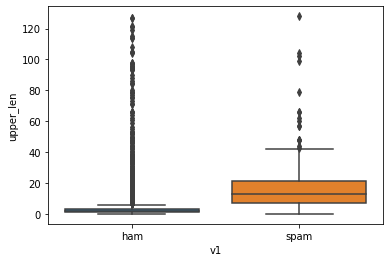

In [42]:
sns.boxplot(data = spam, y='upper_len', x='v1')

실제로 spam 문자의 경우 대문자를 ham보다 상대적으로 많이 쓰인다는 것을 알 수 있다.

### Word2Vec(CBOW)

### parameter

- corpus format : [["my", "name", "is", "jamie"], ["jamie", "is", "cute"]]
- size : 임베딩 차원
- window : 윈도우 사이즈
- min_count : 고려할 단어의 최소 빈도 기준
- workers : cpu core 수
- iter : 반복 학습 횟수(epoch)
- sg : 0 -> CBOW, 1 -> Skip-Gram

In [43]:
corpus = spam['lower_token'].values.tolist()

In [44]:
from gensim.models import Word2Vec

w2v_cbow = Word2Vec(corpus, size=2, window=3, min_count=50, workers=-1, iter=1000, sg=0)

In [45]:
w2v_cbow.most_similar('call', topn=10)

[('please', 0.9999875426292419),
 ("'re", 0.999687135219574),
 ('?', 0.9973670244216919),
 ('something', 0.9971919059753418),
 ('mobile', 0.99683678150177),
 ('home', 0.9957419633865356),
 ('take', 0.9948915243148804),
 ('thk', 0.9932441711425781),
 ('told', 0.9925839900970459),
 ('hey', 0.9895709753036499)]

In [52]:
w2v_cbow.most_similar('get', topn=10)

[(',', 0.9999993443489075),
 ('see', 0.9993036389350891),
 ('cos', 0.9982070922851562),
 ('thing', 0.9969505667686462),
 ('text', 0.9955776333808899),
 ('find', 0.9941020607948303),
 (')', 0.9937784671783447),
 ("n't", 0.9868566989898682),
 ('send', 0.9812396168708801),
 ('life', 0.9774832725524902)]

### Word2Vec(Skip-Gram)

In [46]:
from gensim.models import Word2Vec

w2v_sg = Word2Vec(corpus, size=2, window=3, min_count=50, workers=-1, iter=1000, sg=1)

In [47]:
w2v_sg.most_similar('call', topn=10)

[('please', 0.9999875426292419),
 ("'re", 0.999687135219574),
 ('?', 0.9973670244216919),
 ('something', 0.9971919059753418),
 ('mobile', 0.99683678150177),
 ('home', 0.9957419633865356),
 ('take', 0.9948915243148804),
 ('thk', 0.9932441711425781),
 ('told', 0.9925839900970459),
 ('hey', 0.9895709753036499)]

In [53]:
w2v_sg.most_similar('get', topn=10)

[(',', 0.9999993443489075),
 ('see', 0.9993036389350891),
 ('cos', 0.9982070922851562),
 ('thing', 0.9969505667686462),
 ('text', 0.9955776333808899),
 ('find', 0.9941020607948303),
 (')', 0.9937784671783447),
 ("n't", 0.9868566989898682),
 ('send', 0.9812396168708801),
 ('life', 0.9774832725524902)]

### FastText(CBOW)

In [48]:
from gensim.models import FastText

ft_cbow = FastText(corpus, size=2, window=3, min_count=50, workers=-1, iter=1000, sg=0)

In [49]:
ft_cbow.most_similar('call', topn=10)

[('waiting', 0.9996922612190247),
 ('n', 0.9995921850204468),
 ('stop', 0.9990098476409912),
 ('hope', 0.9986187219619751),
 ('wan', 0.9971522092819214),
 ('r', 0.9961376786231995),
 ('im', 0.996077299118042),
 ('ì_', 0.9943146109580994),
 (',', 0.9939191341400146),
 ('later', 0.9907188415527344)]

In [54]:
ft_cbow.most_similar('get', topn=10)

[('ya', 0.9998858571052551),
 ('like', 0.9981735944747925),
 ("'ve", 0.9979601502418518),
 ('one', 0.9946765303611755),
 ('told', 0.993598461151123),
 ('night', 0.9925190806388855),
 ('send', 0.9879525899887085),
 ('service', 0.9873608350753784),
 ('cash', 0.981899082660675),
 ('chat', 0.9790717363357544)]

### FastText(Skip-Gram)

In [50]:
from gensim.models import FastText

ft_sg = FastText(corpus, size=2, window=3, min_count=50, workers=-1, iter=1000, sg=0)

In [51]:
ft_sg.most_similar('call', topn=10)

[('waiting', 0.9996922612190247),
 ('n', 0.9995921850204468),
 ('stop', 0.9990098476409912),
 ('hope', 0.9986187219619751),
 ('wan', 0.9971522092819214),
 ('r', 0.9961376786231995),
 ('im', 0.996077299118042),
 ('ì_', 0.9943146109580994),
 (',', 0.9939191341400146),
 ('later', 0.9907188415527344)]

In [55]:
ft_sg.most_similar('get', topn=10)

[('ya', 0.9998858571052551),
 ('like', 0.9981735944747925),
 ("'ve", 0.9979601502418518),
 ('one', 0.9946765303611755),
 ('told', 0.993598461151123),
 ('night', 0.9925190806388855),
 ('send', 0.9879525899887085),
 ('service', 0.9873608350753784),
 ('cash', 0.981899082660675),
 ('chat', 0.9790717363357544)]

임베딩의 경우 전체 메세지에서 가장 많이 쓰이는 call과 get을 기준으로 어떤 단어들과 많이 사용되는지를 알아보았다.

call을 나중에 전화드릴게오, 나중에 전화주세요 등 지금 전화를 받지 못할 때 사용되며 get의 경우 무언가를 요청하거나 얻을 때 많이 쓰인다는 것을 알 수 있다.